In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl

sys.path.insert(0, '..')
from context.nd_array.nd_array.normalize_2d_array import normalize_2d_array
from context.fit_skew_t_pdf import fit_skew_t_pdf
from context.fit_skew_t_pdfs import fit_skew_t_pdfs
from context.compute_context import compute_context
from context.make_context_matrix_and_summarize_context import *
from context.plot_context import plot_context

In [3]:
feature_x_sample = pd.read_table('gene_x_cell_line.tsv', index_col=0)

feature_x_sample = pd.DataFrame(
    normalize_2d_array(feature_x_sample.values, '-0-'),
    index=feature_x_sample.index,
    columns=feature_x_sample.columns)

# feature_x_sample

In [4]:
array_1d = np.random.random_sample(10)

In [5]:
n, location, scale, df, shape = fit_skew_t_pdf(array_1d)
print('N={}\tLocation={:.3f}\tScale={:.3f}\tDF={:.3f}\tShape={:.3f}'.format(
    n, location, scale, df, shape))

n, location, scale, df, shape = fit_skew_t_pdf(
    array_1d, fit_fixed_location=10, fit_fixed_scale=10)
print('N={}\tLocation={:.3f}\tScale={:.3f}\tDF={:.3f}\tShape={:.3f}'.format(
    n, location, scale, df, shape))

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


N=10	Location=0.021	Scale=0.665	DF=8445783.270	Shape=43895740.044
N=10	Location=10.000	Scale=10.000	DF=14163340.211	Shape=-16799703.676


In [6]:
context_dict = compute_context(array_1d)

for key, value in context_dict.items():
    print(key)
    print(value)
    print(value.shape)
    print()

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


fit
[  1.00000000e+01   2.06932054e-02   6.64697276e-01   8.44578327e+06
   4.38957400e+07]
(5,)

grid
[ 0.02069329  0.02101953  0.02134578 ...,  0.99846276  0.99878901
  0.99911526]
(3000,)

pdf
[ 1.20037274  1.20037267  1.20037224 ...,  0.40685924  0.40656554
  0.40627196]
(3000,)

pdf_transformed
[ 1.20037274  1.19992085  1.19946885 ...,  0.          0.          0.        ]
(3000,)

context_indices
[ 0.          0.97698749  0.97898829 ...,  1.          1.          1.        ]
(3000,)

context_indices_like_array
[ 1.          0.9974943   1.          1.          0.99308231  1.
  0.99747489  1.          1.          0.        ]
(10,)

context_summary
5.99192555776
()



In [7]:
feature_x_skew_t_pdf_fit_parameter = fit_skew_t_pdfs(feature_x_sample)

feature_x_skew_t_pdf_fit_parameter

(1/9) KRAS ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


(2/9) SOX10 ...
(3/9) ERBB3 ...
(4/9) MYC ...
(5/9) MAP4K4 ...
(6/9) GAPDH ...
(7/9) FAT1 ...
(8/9) PTEN ...
(9/9) TP53 ...


,N,Location,Scale,DF,Shape
Feature,,,,,
KRAS,501.0,1.083133,1.164275,4.304392,-3.030155
SOX10,501.0,0.550756,0.592344,2.306226,-0.929914
ERBB3,501.0,0.452074,0.606843,3.987367,-1.111803
MYC,501.0,-0.946118,1.227359,15.292884,2.261243
MAP4K4,501.0,0.482438,0.885836,7.522607,-0.764379
GAPDH,501.0,-1.666089,2.258010,1279.158480,2.326992
FAT1,501.0,-0.173529,0.362648,15.376174,0.699471
PTEN,501.0,-0.808029,1.057576,198799.571299,3.093096
TP53,501.0,-1.357790,1.506077,6.161618,5.347668


In [8]:
context__feature_x_sample, feature_context_summary = make_context_matrix_and_summarize_context(
    feature_x_sample)

(1/9) KRAS ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


(2/9) SOX10 ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


(3/9) ERBB3 ...
(4/9) MYC ...
(5/9) MAP4K4 ...
(6/9) GAPDH ...
(7/9) FAT1 ...
(8/9) PTEN ...
(9/9) TP53 ...


In [9]:
context__feature_x_sample

,22RV1_PROSTATE,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,786O_KIDNEY,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A549_LUNG,A673_BONE,ACHN_KIDNEY,...,UACC812_BREAST,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,ZR751_BREAST
Feature,,,,,,,,,,,,,,,,,,,,,
KRAS,0.000000e+00,0.000000,-4.871247e-01,-0.521067,0.199773,0.000000e+00,-3.673931e-01,-5.311489e-01,0.000000e+00,0.186761,...,-0.506701,3.181085e-01,-0.508682,-0.360440,-4.696238e-01,-4.631085e-01,-0.512595,-5.271309e-01,0.000000,-5.216333e-01
SOX10,-7.464074e-01,0.000000,7.307757e-01,-0.743263,0.532710,-7.924787e-01,-6.138557e-01,7.675993e-01,0.000000e+00,-0.784877,...,0.722522,-9.731200e-01,-0.779519,-0.753416,-9.899638e-01,-5.762208e-01,-0.916670,-8.191791e-01,-0.759331,4.560981e-01
ERBB3,0.000000e+00,0.000760,-0.000000e+00,0.000000,0.000000,-0.000000e+00,1.926532e-03,-0.000000e+00,8.404448e-04,-0.000000,...,-0.000000,0.000000e+00,0.000000,0.000000,-0.000000e+00,0.000000e+00,0.000000,-0.000000e+00,-0.000000,-0.000000e+00
MYC,0.000000e+00,0.000000,-0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,9.994034e-04,0.000000e+00,0.000000,...,0.000000,0.000000e+00,-0.000000,0.000836,6.228589e-04,0.000000e+00,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00
MAP4K4,0.000000e+00,-0.000000,5.981316e-07,0.000057,0.000000,5.981316e-07,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000027,...,-0.000000,-0.000000e+00,-0.000000,0.000051,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,-0.000000e+00
GAPDH,0.000000e+00,-0.000000,-0.000000e+00,0.000000,-0.000000,0.000000e+00,-0.000000e+00,0.000000e+00,6.915180e-07,0.000000,...,0.000000,0.000000e+00,-0.000000,0.000000,-0.000000e+00,0.000000e+00,-0.000000,1.298086e-07,-0.000000,0.000000e+00
FAT1,0.000000e+00,-0.000000,0.000000e+00,0.000000,-0.000000,0.000000e+00,-0.000000e+00,-0.000000e+00,-3.854182e-07,-0.000000,...,-0.000000,-6.754545e-08,0.000000,-0.000000,-0.000000e+00,-8.884920e-07,0.000000,0.000000e+00,0.000000,-7.450303e-07
PTEN,-4.403436e-10,0.000000,-0.000000e+00,0.000000,-0.000000,0.000000e+00,-2.313292e-09,4.490311e-12,-1.431990e-09,-0.000000,...,-0.000000,-6.919244e-10,0.000000,0.000000,-1.492808e-10,-0.000000e+00,0.000000,0.000000e+00,0.000000,-1.396968e-09
TP53,7.459420e-01,0.823084,7.301857e-01,0.823325,0.814255,8.218028e-01,-3.431338e-01,7.942895e-01,6.771880e-01,0.795583,...,0.734692,8.240315e-01,0.810619,0.883247,8.239287e-01,8.241753e-01,0.737059,6.814423e-01,-0.514529,8.223089e-01


In [10]:
feature_context_summary

Feature
KRAS     -1.558495e+02
SOX10    -1.487157e+02
ERBB3    -1.298182e+00
MYC       8.491425e+00
MAP4K4   -3.169682e+00
GAPDH     6.073033e+00
FAT1      4.160611e-09
PTEN      5.440292e+00
TP53      2.566253e+02
Name: Context Summary, dtype: float64

In [11]:
absolute_value_weighted_context__feature_x_sample = feature_x_sample.abs(
) * context__feature_x_sample

absolute_value_weighted_context__feature_x_sample

,22RV1_PROSTATE,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,786O_KIDNEY,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A549_LUNG,A673_BONE,ACHN_KIDNEY,...,UACC812_BREAST,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,ZR751_BREAST
KRAS,0.000000e+00,0.000000,-2.411057e-02,-0.194809,0.151356,0.000000e+00,-1.968092e-01,-5.308885e-01,0.000000e+00,0.143471,...,-0.073133,1.990186e-01,-0.086016,-0.198239,-7.968180e-02,-9.559228e-02,-0.114095,-2.843591e-01,0.000000,-2.011826e-01
SOX10,-6.750424e-01,0.000000,3.009072e-01,-0.690836,0.330299,-4.038511e-01,-1.924100e+00,2.518040e-01,0.000000e+00,-0.457232,...,0.306642,-4.108937e+00,-0.492558,-2.637901,-4.374957e+00,-1.266387e+00,-3.606527,-8.214189e-02,-0.609624,3.044422e-01
ERBB3,0.000000e+00,0.000284,-0.000000e+00,0.000000,0.000000,-0.000000e+00,6.615255e-04,-0.000000e+00,3.124502e-04,-0.000000,...,-0.000000,0.000000e+00,0.000000,0.000000,-0.000000e+00,0.000000e+00,0.000000,-0.000000e+00,-0.000000,-0.000000e+00
MYC,0.000000e+00,0.000000,-0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,2.197586e-04,0.000000e+00,0.000000,...,0.000000,0.000000e+00,-0.000000,0.000222,5.081332e-05,0.000000e+00,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00
MAP4K4,0.000000e+00,-0.000000,2.479005e-07,0.000016,0.000000,2.483963e-07,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000004,...,-0.000000,-0.000000e+00,-0.000000,0.000010,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,-0.000000e+00
GAPDH,0.000000e+00,-0.000000,-0.000000e+00,0.000000,-0.000000,0.000000e+00,-0.000000e+00,0.000000e+00,2.684231e-07,0.000000,...,0.000000,0.000000e+00,-0.000000,0.000000,-0.000000e+00,0.000000e+00,-0.000000,6.496747e-08,-0.000000,0.000000e+00
FAT1,0.000000e+00,-0.000000,0.000000e+00,0.000000,-0.000000,0.000000e+00,-0.000000e+00,-0.000000e+00,-8.179423e-08,-0.000000,...,-0.000000,-1.682625e-08,0.000000,-0.000000,-0.000000e+00,-1.538312e-07,0.000000,0.000000e+00,0.000000,-7.058435e-08
PTEN,-2.533291e-10,0.000000,-0.000000e+00,0.000000,-0.000000,0.000000e+00,-1.026897e-09,1.308414e-12,-7.701084e-10,-0.000000,...,-0.000000,-2.621282e-10,0.000000,0.000000,-5.064461e-11,-0.000000e+00,0.000000,0.000000e+00,0.000000,-7.535900e-10
TP53,2.569310e-01,0.960482,3.363947e-01,0.981578,0.560890,8.682132e-01,-4.080308e-01,1.683807e-01,4.991889e-01,0.186791,...,0.315328,2.217420e+00,0.463975,2.973476,1.045817e+00,1.077215e+00,0.305346,4.897564e-01,-0.550211,9.016373e-01


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


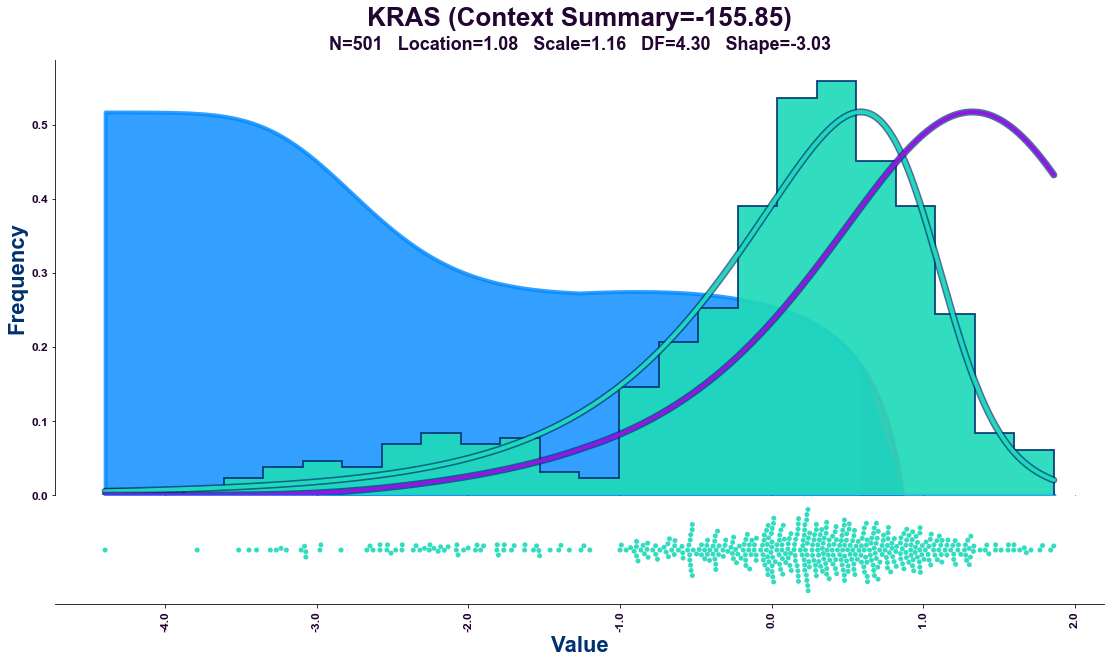

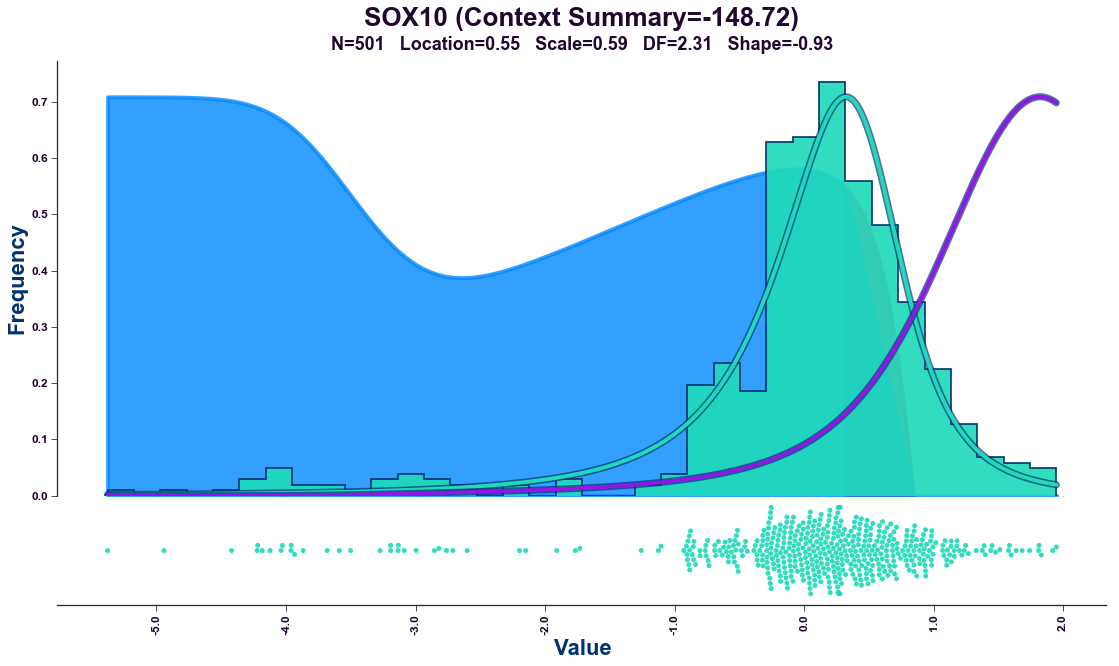

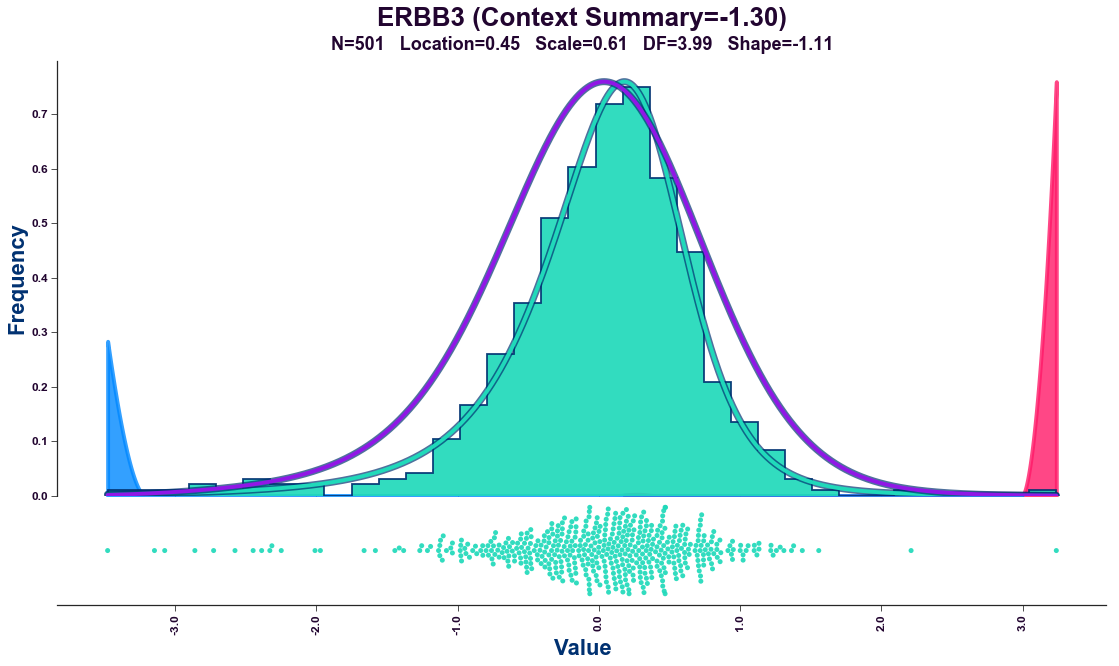

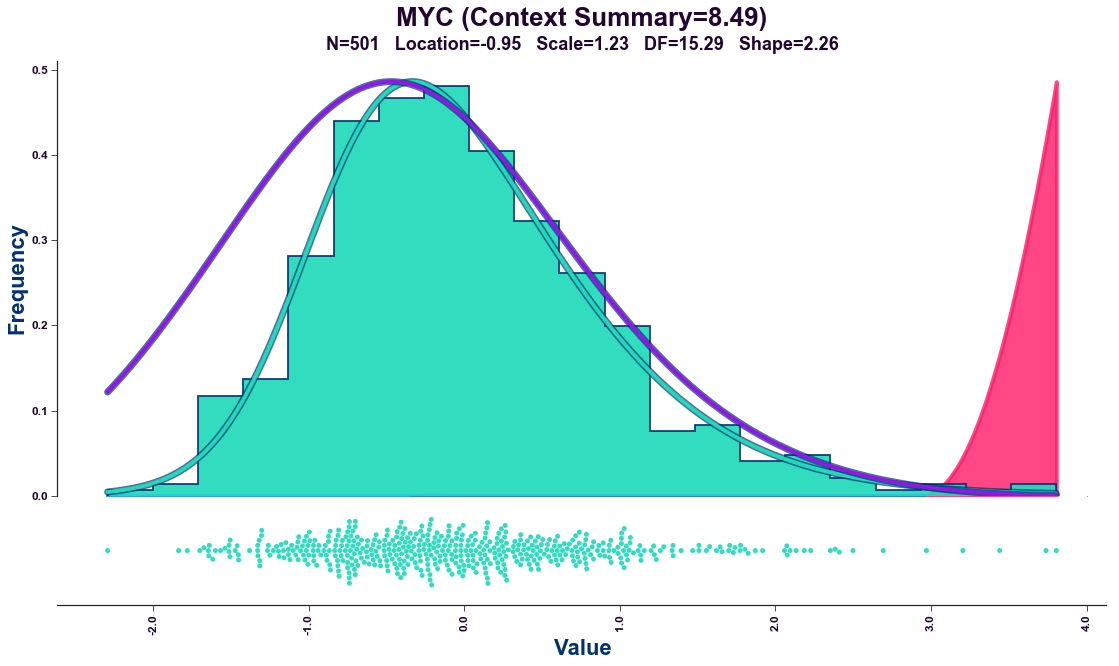

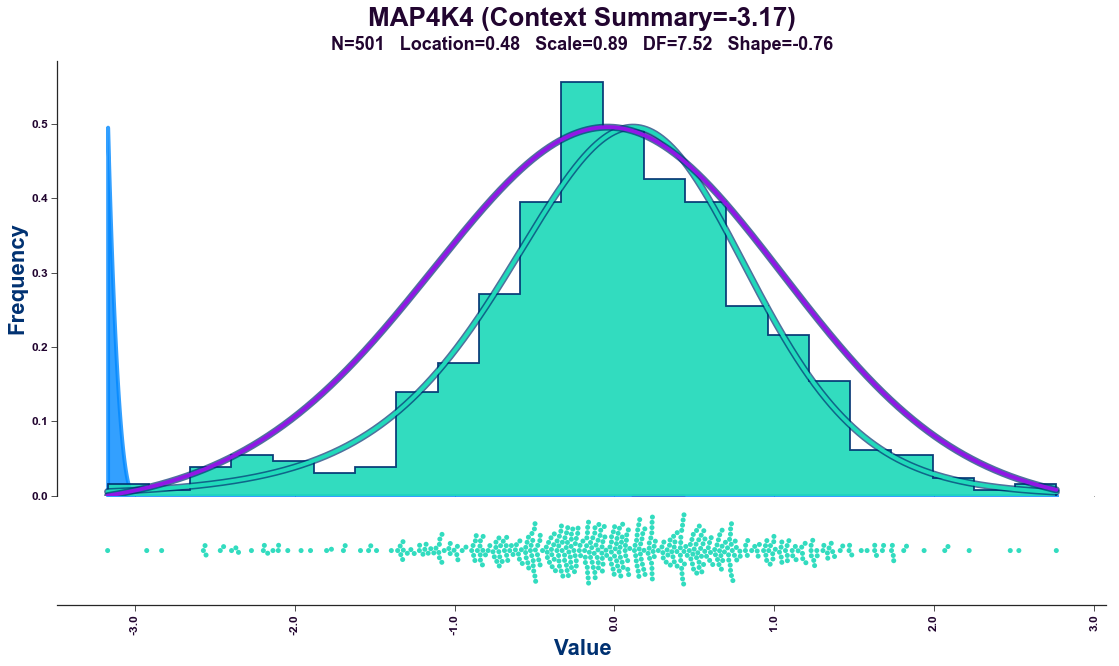

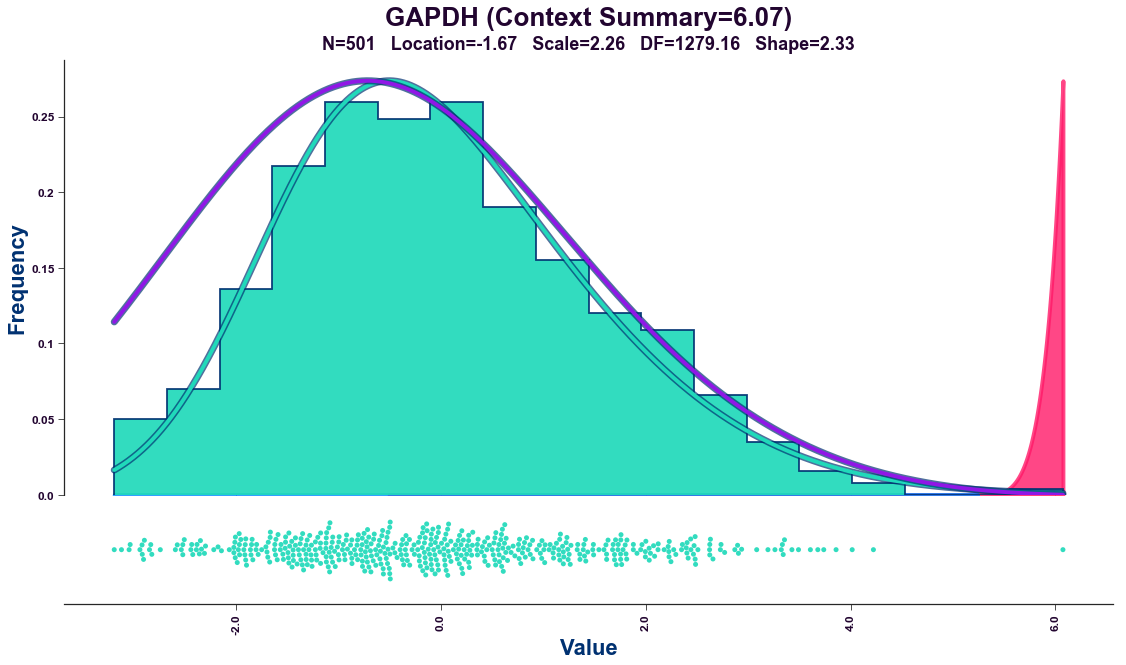

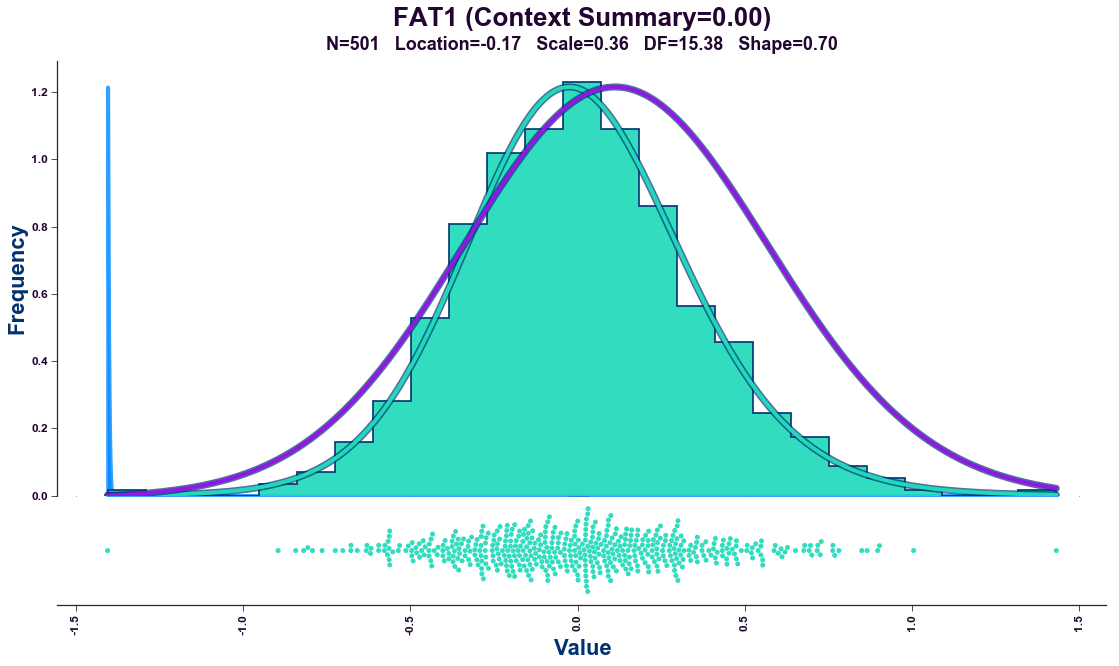

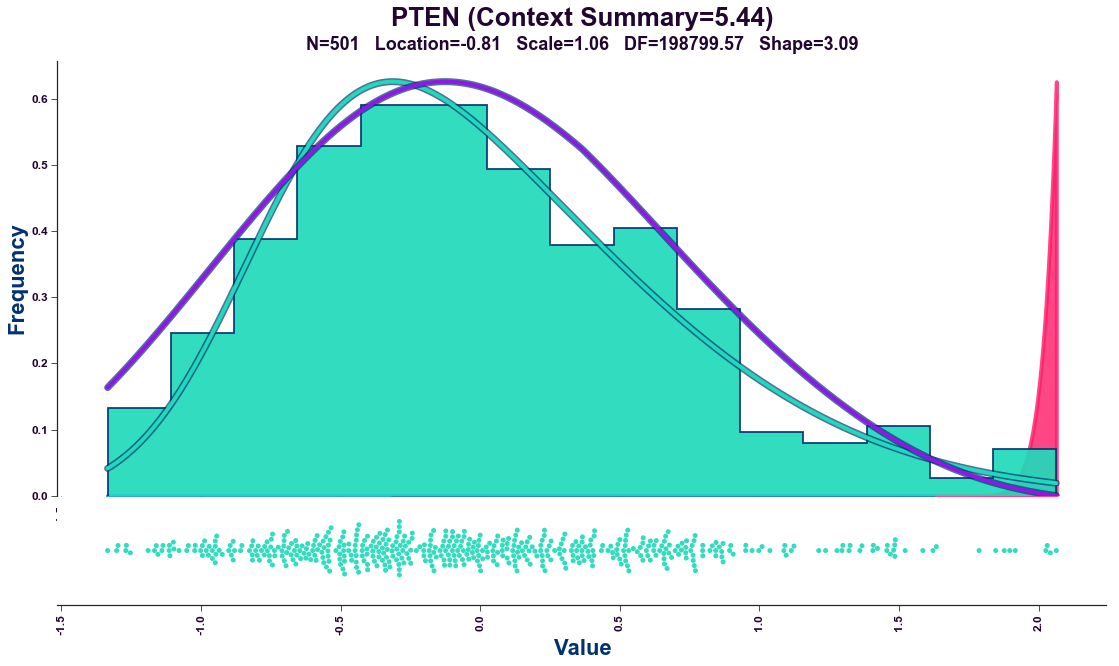

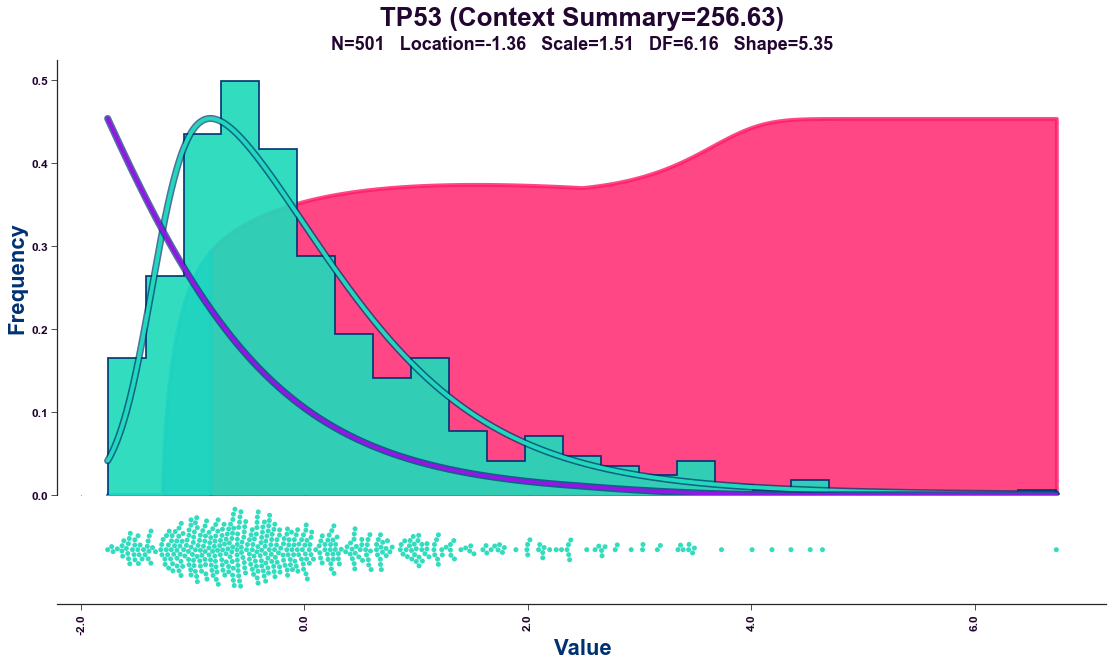

In [12]:
for feature, feature_vector in feature_x_sample.iterrows():
    plot_context(feature_vector, feature)

In [13]:
feature_x_sample = pd.read_table('compound_x_cell_line.tsv', index_col=0)

feature_x_sample = pd.DataFrame(
    normalize_2d_array(feature_x_sample.values, '-0-'),
    index=feature_x_sample.index,
    columns=feature_x_sample.columns)

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


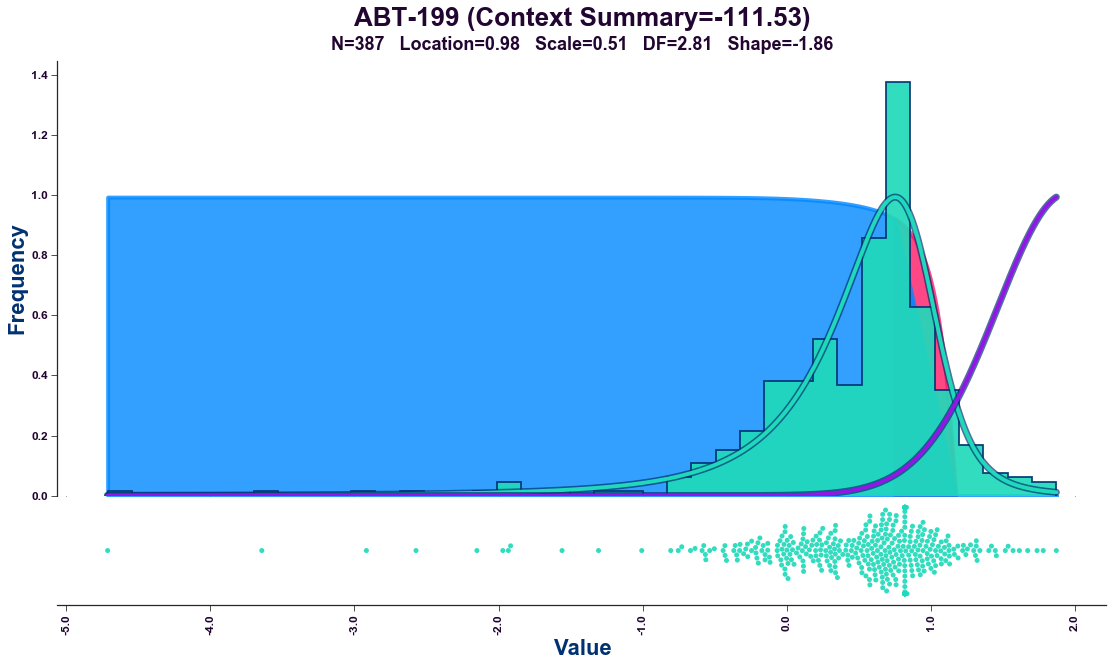

In [30]:
for feature, feature_vector in feature_x_sample.iterrows():
    if feature != 'ABT-199':
        continue
        
    plot_context(
        feature_vector.dropna(), feature, add_context_summary_to_title=True)

    mpl.pyplot.show()
    print('\n' * 10)